# Importation des librairies

In [14]:
# Configuration du chemin d'accès
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

import eda

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABORN
import seaborn as sns

# SCIKIT-LEARN: SELECTION DE VARIABLES

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# SCIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # Encodage des variables catégorielles ordinales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # Encodage des variables catégorielles nominales
from sklearn.preprocessing import StandardScaler # Normalisation des variables numériques
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer # Imputation
from sklearn.impute import KNNImputer 

# SCIKIT-LEARN: MODELES
from sklearn.linear_model import LogisticRegression

# SCIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # Séparer en données train et test
from sklearn.model_selection import cross_val_score # Validation croisée pour comparison entre modèles
from sklearn.model_selection import validation_curve # Courbe de validation : visulaisr des scores lors du choix d'un hyper-paramètre
from sklearn.model_selection import GridSearchCV # Tester plusieurs hyper-paramètres
from sklearn.model_selection import learning_curve # Courbe d'apprentissage : visualisation des scores du train et du validation sets en fonction des quanitiés des données
 
## EVALUATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# SCHIKIT-LEARN: PIPELINE AND TRANSFORMATEURll
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


# Analyse exploratoire de données - Analyse de forme (description des variables)

## Chargement des données

In [15]:
data = pd.read_csv('../data/smoking_driking_dataset_Ver01.csv')
df_smoking_drinking = data.copy()

## Aperçu des données

In [16]:
df_smoking_drinking.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [17]:
# df_smoking_drinking.tail()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

Notons qu'il faudra caster certains variables dans leur type natif lors du nettoyage des données.

## Dimension des données 

In [19]:
df_smoking_drinking.shape

(991346, 24)

In [20]:
# Vérifier l'existence des duplications d'exemples 
duplicate_df_smoking_drinking = df_smoking_drinking[df_smoking_drinking.duplicated()]
duplicate_df_smoking_drinking
# df_smoking_drinking.duplicated().sum()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
159911,Female,40,170,85,88.0,0.9,0.9,1.0,1.0,120.0,70.0,110.0,191.0,47.0,121.0,115.0,10.4,1.0,0.9,17.0,14.0,33.0,1.0,N
175152,Male,65,170,75,101.1,0.6,0.7,1.0,1.0,130.0,70.0,114.0,175.0,38.0,109.0,140.0,17.1,1.0,1.0,24.0,31.0,26.0,3.0,N
246305,Female,50,155,70,90.8,1.0,1.0,1.0,1.0,150.0,96.0,101.0,230.0,43.0,150.0,183.0,14.9,1.0,0.8,24.0,22.0,42.0,1.0,N
280830,Male,45,170,75,86.4,1.2,0.7,1.0,1.0,150.0,78.0,195.0,222.0,55.0,122.0,499.0,14.9,1.0,0.8,23.0,11.0,342.0,3.0,Y
284528,Female,65,150,55,86.0,0.9,0.9,1.0,1.0,120.0,65.0,99.0,228.0,62.0,139.0,136.0,11.9,1.0,0.7,27.0,18.0,14.0,1.0,N
290463,Female,20,160,50,70.0,1.0,1.0,1.0,1.0,106.0,68.0,76.0,154.0,45.0,98.0,56.0,12.7,1.0,0.8,18.0,13.0,11.0,1.0,N
335747,Male,50,180,95,101.0,1.5,1.5,1.0,2.0,177.0,111.0,141.0,184.0,43.0,120.0,105.0,15.0,3.0,0.9,19.0,27.0,61.0,3.0,Y
429596,Male,75,160,60,83.0,1.2,0.7,1.0,1.0,105.0,70.0,114.0,218.0,52.0,150.0,82.0,16.0,2.0,1.1,27.0,22.0,26.0,1.0,N
453451,Male,35,170,65,85.0,0.9,1.2,1.0,1.0,130.0,78.0,99.0,149.0,44.0,80.0,126.0,14.7,1.0,0.9,14.0,13.0,10.0,2.0,Y
471596,Female,45,165,65,82.0,1.0,1.0,1.0,1.0,120.0,80.0,87.0,178.0,64.0,103.0,53.0,13.6,1.0,0.5,17.0,19.0,28.0,1.0,N


In [21]:
# Supprimer les duplications
df_smoking_drinking.drop_duplicates(inplace=True)

In [22]:
# duplicate_df_smoking_drinking = df_smoking_drinking[df_smoking_drinking.duplicated()]
# duplicate_df_smoking_drinking

In [23]:
df_smoking_drinking.shape

(991320, 24)

Nous disposons d'un dataset de n = 991320 entrées, avec 22 variables explicatives et 2 variables cibles.

## Type des variables

In [24]:
df_smoking_drinking.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

In [25]:
df_smoking_drinking.dtypes.value_counts()

float64    19
int64       3
object      2
Name: count, dtype: int64

Variables explicatives du dataset : 
- Sex : male, female [catégorielle]
- age : âge de l'individu (arrondi à 5 ans près) [continue]
- height : taille de l'individu (arrondi à 5 cm près) [cm] [continue]
- weight : poids [kg] [continue]
- waistline (non cité dans la description du dataset mais présent) : tour de taille [cm] [continue]
- sight_left : eyesight(left) [continue]
- sight_right : eyesight(right)	[continue]
- hear_left : ouïe gauche, 1(normale), 2(anormale) [catégorielle]
- hear_right : ouïe droite, 1(normale), 2(anormale) [catégorielle]
- SBP : pression artérielle systolique [mmHg] [continue]
- DBP :  pression artérielle diastolique [mmHg] [continue]
- BLDS : glycémie à jeun [mg/dL] [continue]
- tot_chole	: cholesterol total [mg/dL] [continue]
- HDL_chole : taux de cholesterol HDL ("bon" cholesterol) [mg/dL] [continue]
- LDL_chole	: taux de cholesterol LDL ("mauvais" cholesterol) [mg/dL] [continue]
- triglyceride : triglyceride [mg/dL] [continue]
- hemoglobin : hemoglobine [g/dL] [continue]
- urine_protein : protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4) [catégorielle ordinale ?]
- serum_creatinine : creatinine sanguine [mg/dL] [continue]
- SGOT_AST : SGOT (transaminase glutamique-oxaloacétique sérique) AST(Aspartate transaminase)[IU/L] [continue]
- SGOT_ALT : ALT (alanine aminotransférase)[IU/L] [continue]
- gamma_GTP : y-glutamyl transpeptidase[IU/L] [continue]

Variables cibles : 
- SMK_stat_type_cd : Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke) [catégorielle]
- DRK_YN : Drinker or Not [catégorielle]

Comme indiqué précédemment, besoin de caster les variables pour identifier correctement les variables quantitatives (continues) et catégorielles :
- de int à float : age, height, weight
- de float à int : hear_left, hear_right, urine_protein, SMK_stat_type_cd

In [27]:
# Conversion des variables âge, poids et taille en numérique
df_smoking_drinking['age'] = df_smoking_drinking['age'].astype('float64')
df_smoking_drinking['weight'] = df_smoking_drinking['weight'].astype('float64')
df_smoking_drinking['height'] = df_smoking_drinking['height'].astype('float64')

In [28]:
# Conversion des variables hear_left, hear_right, urine_protein, SMK_stat_type_cd en catégorielles
df_smoking_drinking['hear_left'] = df_smoking_drinking['hear_left'].astype('int64')
df_smoking_drinking['hear_right'] = df_smoking_drinking['hear_right'].astype('int64')
df_smoking_drinking['urine_protein'] = df_smoking_drinking['urine_protein'].astype('int64')
df_smoking_drinking['SMK_stat_type_cd'] = df_smoking_drinking['SMK_stat_type_cd'].astype('int64')

In [29]:
df_smoking_drinking.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35.0,170.0,75.0,90.0,1.0,1.0,1,1,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1,1.0,21.0,35.0,40.0,1,Y
1,Male,30.0,180.0,80.0,89.0,0.9,1.2,1,1,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1,0.9,20.0,36.0,27.0,3,N
2,Male,40.0,165.0,75.0,91.0,1.2,1.5,1,1,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1,0.9,47.0,32.0,68.0,1,N
3,Male,50.0,175.0,80.0,91.0,1.5,1.2,1,1,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1,1.1,29.0,34.0,18.0,1,N
4,Male,50.0,165.0,60.0,80.0,1.0,1.2,1,1,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1,0.8,19.0,12.0,25.0,1,N


In [30]:
df_smoking_drinking.dtypes

sex                  object
age                 float64
height              float64
weight              float64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd      int64
DRK_YN               object
dtype: object

<Axes: ylabel='count'>

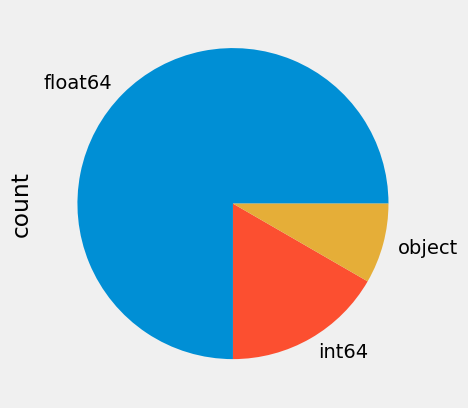

In [31]:
df_smoking_drinking.dtypes.value_counts().plot.pie()

- Variables catégorielles : int64, object
- Variables numériques : float64

## Valeurs manquantes

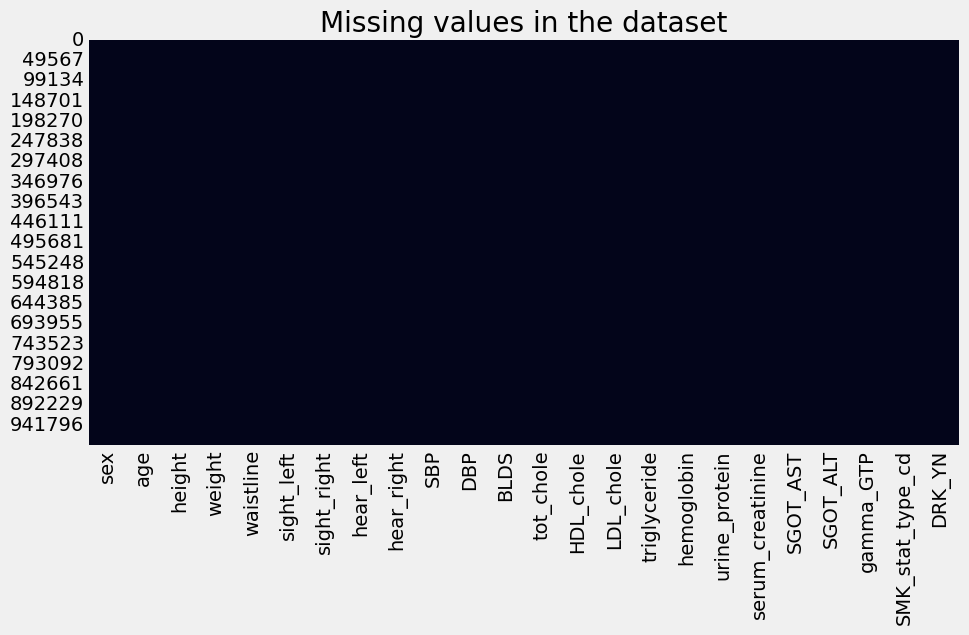

In [32]:
# Visualiser les valeurs manquantes avec seaborn
plt.figure(figsize=(10, 5))
sns.heatmap(df_smoking_drinking.isna(), cbar=False)
plt.title('Missing values in the dataset')
plt.show()

In [33]:
# print('Missing values in the dataset')
# df_smoking_drinking.isna().sum()

Il n'y a pas de valeurs manquantes dans le dataset, nous n'aurons donc pas besoin d'appliquer de stratégie pour les remplacer lors de l'étape de prétraitement des données.

# Analyse exploratoire de données - Analyse univariée (signification des variables)

## Variable cible 1 : SMK_stat_type_cd

In [34]:
df_smoking_drinking['SMK_stat_type_cd'].value_counts(normalize=True)

SMK_stat_type_cd
1    0.607706
3    0.215818
2    0.176476
Name: proportion, dtype: float64

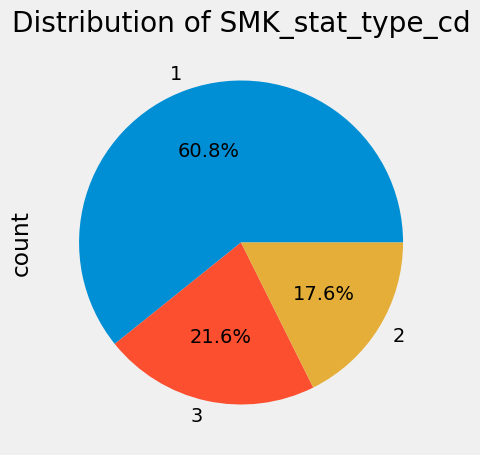

In [35]:
# Affichage des valeurs uniques de la variable SMK_stat_type_cd sous forme de camembert
plt.figure(figsize=(10, 5))
df_smoking_drinking['SMK_stat_type_cd'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of SMK_stat_type_cd')
plt.show()

=> Les classes sont déséquilibrées, cela doit être pris en compte pour le choix de la métrique d'évaluation des modèles

## Variable cible 2 : DRK_YN

In [36]:
df_smoking_drinking['DRK_YN'].value_counts(normalize=True)

DRK_YN
N    0.500186
Y    0.499814
Name: proportion, dtype: float64

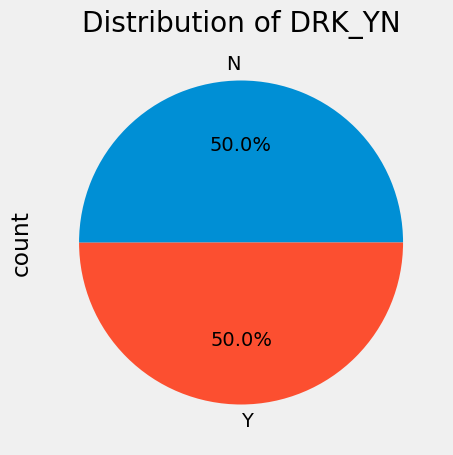

In [37]:
# Affichage des valeurs uniques de la variable DRK_YN sous forme de camembert
plt.figure(figsize=(10, 5))
df_smoking_drinking['DRK_YN'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of DRK_YN')
plt.show()

=> Les classes sont presques parfaitement équilibrées, cela ne poserait donc pas problème d'utiliser par exemple l'accuracy comme score d'évaluation des modèles de classification

## Variables qualitatives

In [38]:
cat_features = df_smoking_drinking.select_dtypes(include = ['int64', 'object']).columns
cat_features = cat_features.drop(['DRK_YN', 'SMK_stat_type_cd'])
cat_features

Index(['sex', 'hear_left', 'hear_right', 'urine_protein'], dtype='object')

In [39]:
for feature in cat_features:
    print(f'{feature :-<30} {df_smoking_drinking[feature].unique()}')

sex--------------------------- ['Male' 'Female']
hear_left--------------------- [1 2]
hear_right-------------------- [1 2]
urine_protein----------------- [1 3 2 4 5 6]


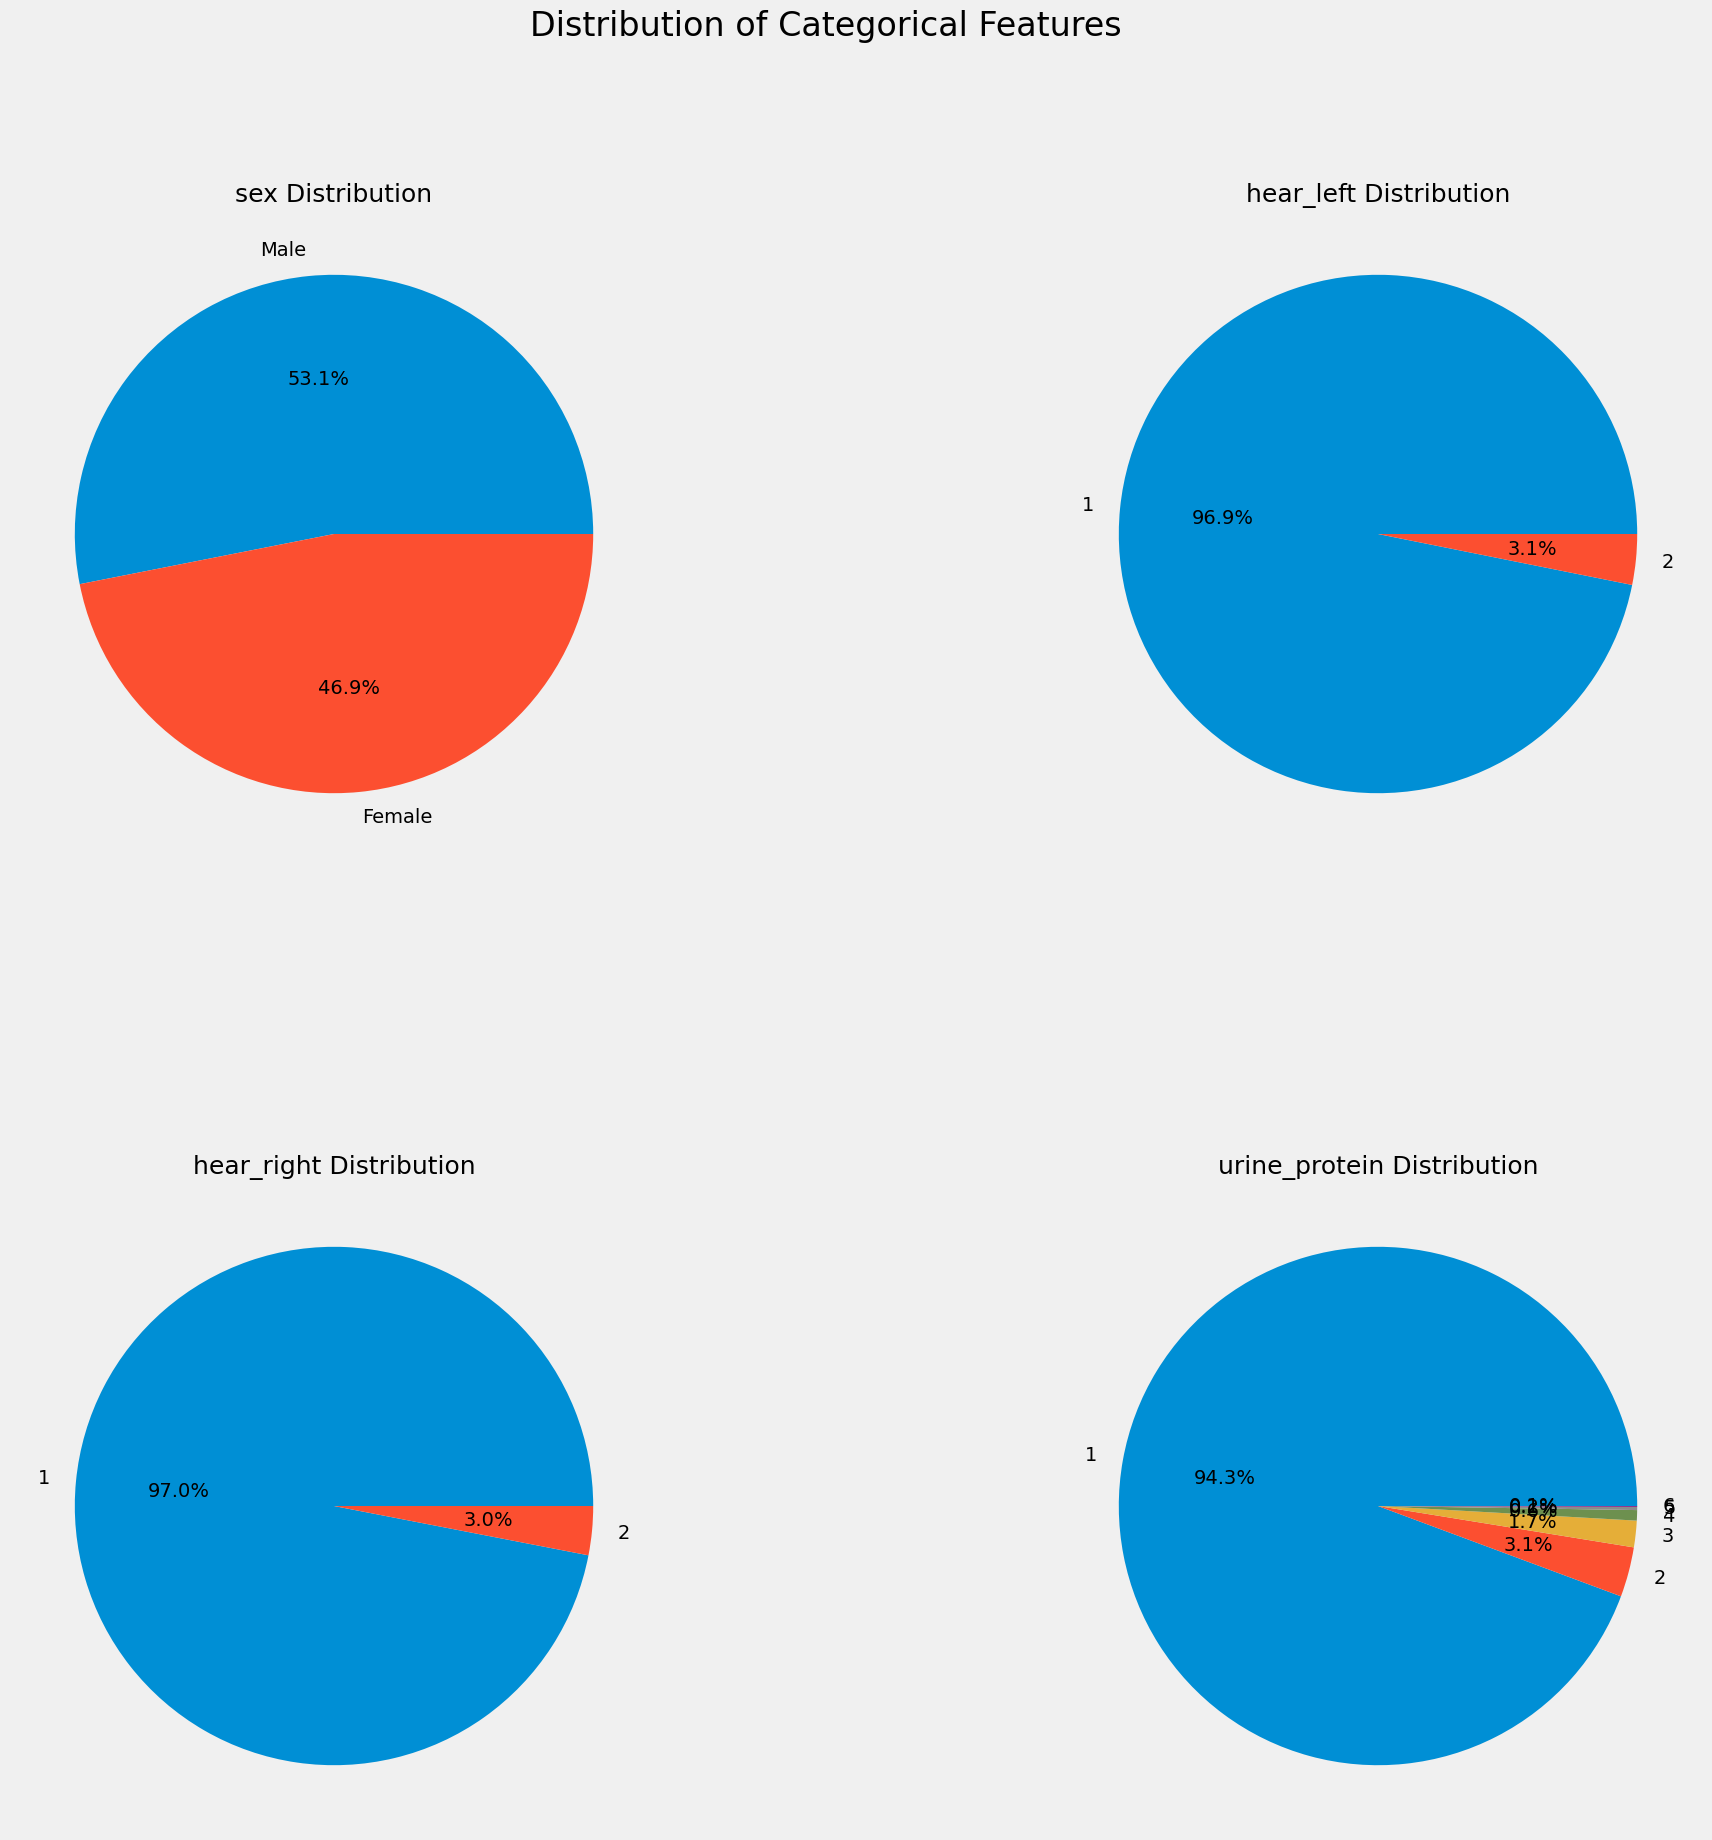

In [40]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Distribution of Categorical Features', fontsize=24)

# Loop through the length of the cat_features and keep track of the index
for i, feature in enumerate(cat_features):
    # Add a new subplot iteratively
    ax = plt.subplot(2, 2, i+1)
    # Plot the distribution of each feature
    df_smoking_drinking[feature].value_counts().plot.pie(ax=ax, autopct='%1.1f%%')
    # Chart formatting
    ax.set_title(f'{feature} Distribution', fontsize=18)
    ax.set_ylabel("")

plt.show()


Toutes les variables explicatives catégorielles sont binaires. Nous avons une proportion d'homme/femme similaire, mais le reste des variables catégorielles ont des classes TRES fortement déséquilibrées.

## Variables numériques

In [41]:
# df_smoking_drinking.dtypes

In [42]:
cont_features = df_smoking_drinking.select_dtypes('float64').columns
cont_features

Index(['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right',
       'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole',
       'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST',
       'SGOT_ALT', 'gamma_GTP'],
      dtype='object')

In [43]:
# cont_features.shape

In [44]:
df_smoking_drinking[cont_features].describe()

,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
count,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000
mean,47.614529,162.240563,63.283884,81.233255,0.980833,0.978428,122.432360,76.052549,100.424305,195.556769,56.936984,113.037429,132.140030,14.229810,0.860467,25.989424,25.755148,37.136152
std,14.181346,9.282922,12.514101,11.850296,0.605954,0.604779,14.543083,9.889334,24.179852,38.660092,17.238578,35.842938,102.194762,1.584924,0.480536,23.493668,26.308910,50.423811
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,67.000000,32.000000,25.000000,30.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,112.000000,70.000000,88.000000,169.000000,46.000000,89.000000,73.000000,13.200000,0.700000,19.000000,15.000000,16.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,120.000000,76.000000,96.000000,193.000000,55.000000,111.000000,106.000000,14.300000,0.800000,23.000000,20.000000,23.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,131.000000,82.000000,105.000000,219.000000,66.000000,135.000000,159.000000,15.400000,1.000000,28.000000,29.000000,39.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,273.000000,185.000000,852.000000,2344.000000,8110.000000,5119.000000,9490.000000,25.000000,98.000000,9999.000000,7210.000000,999.000000


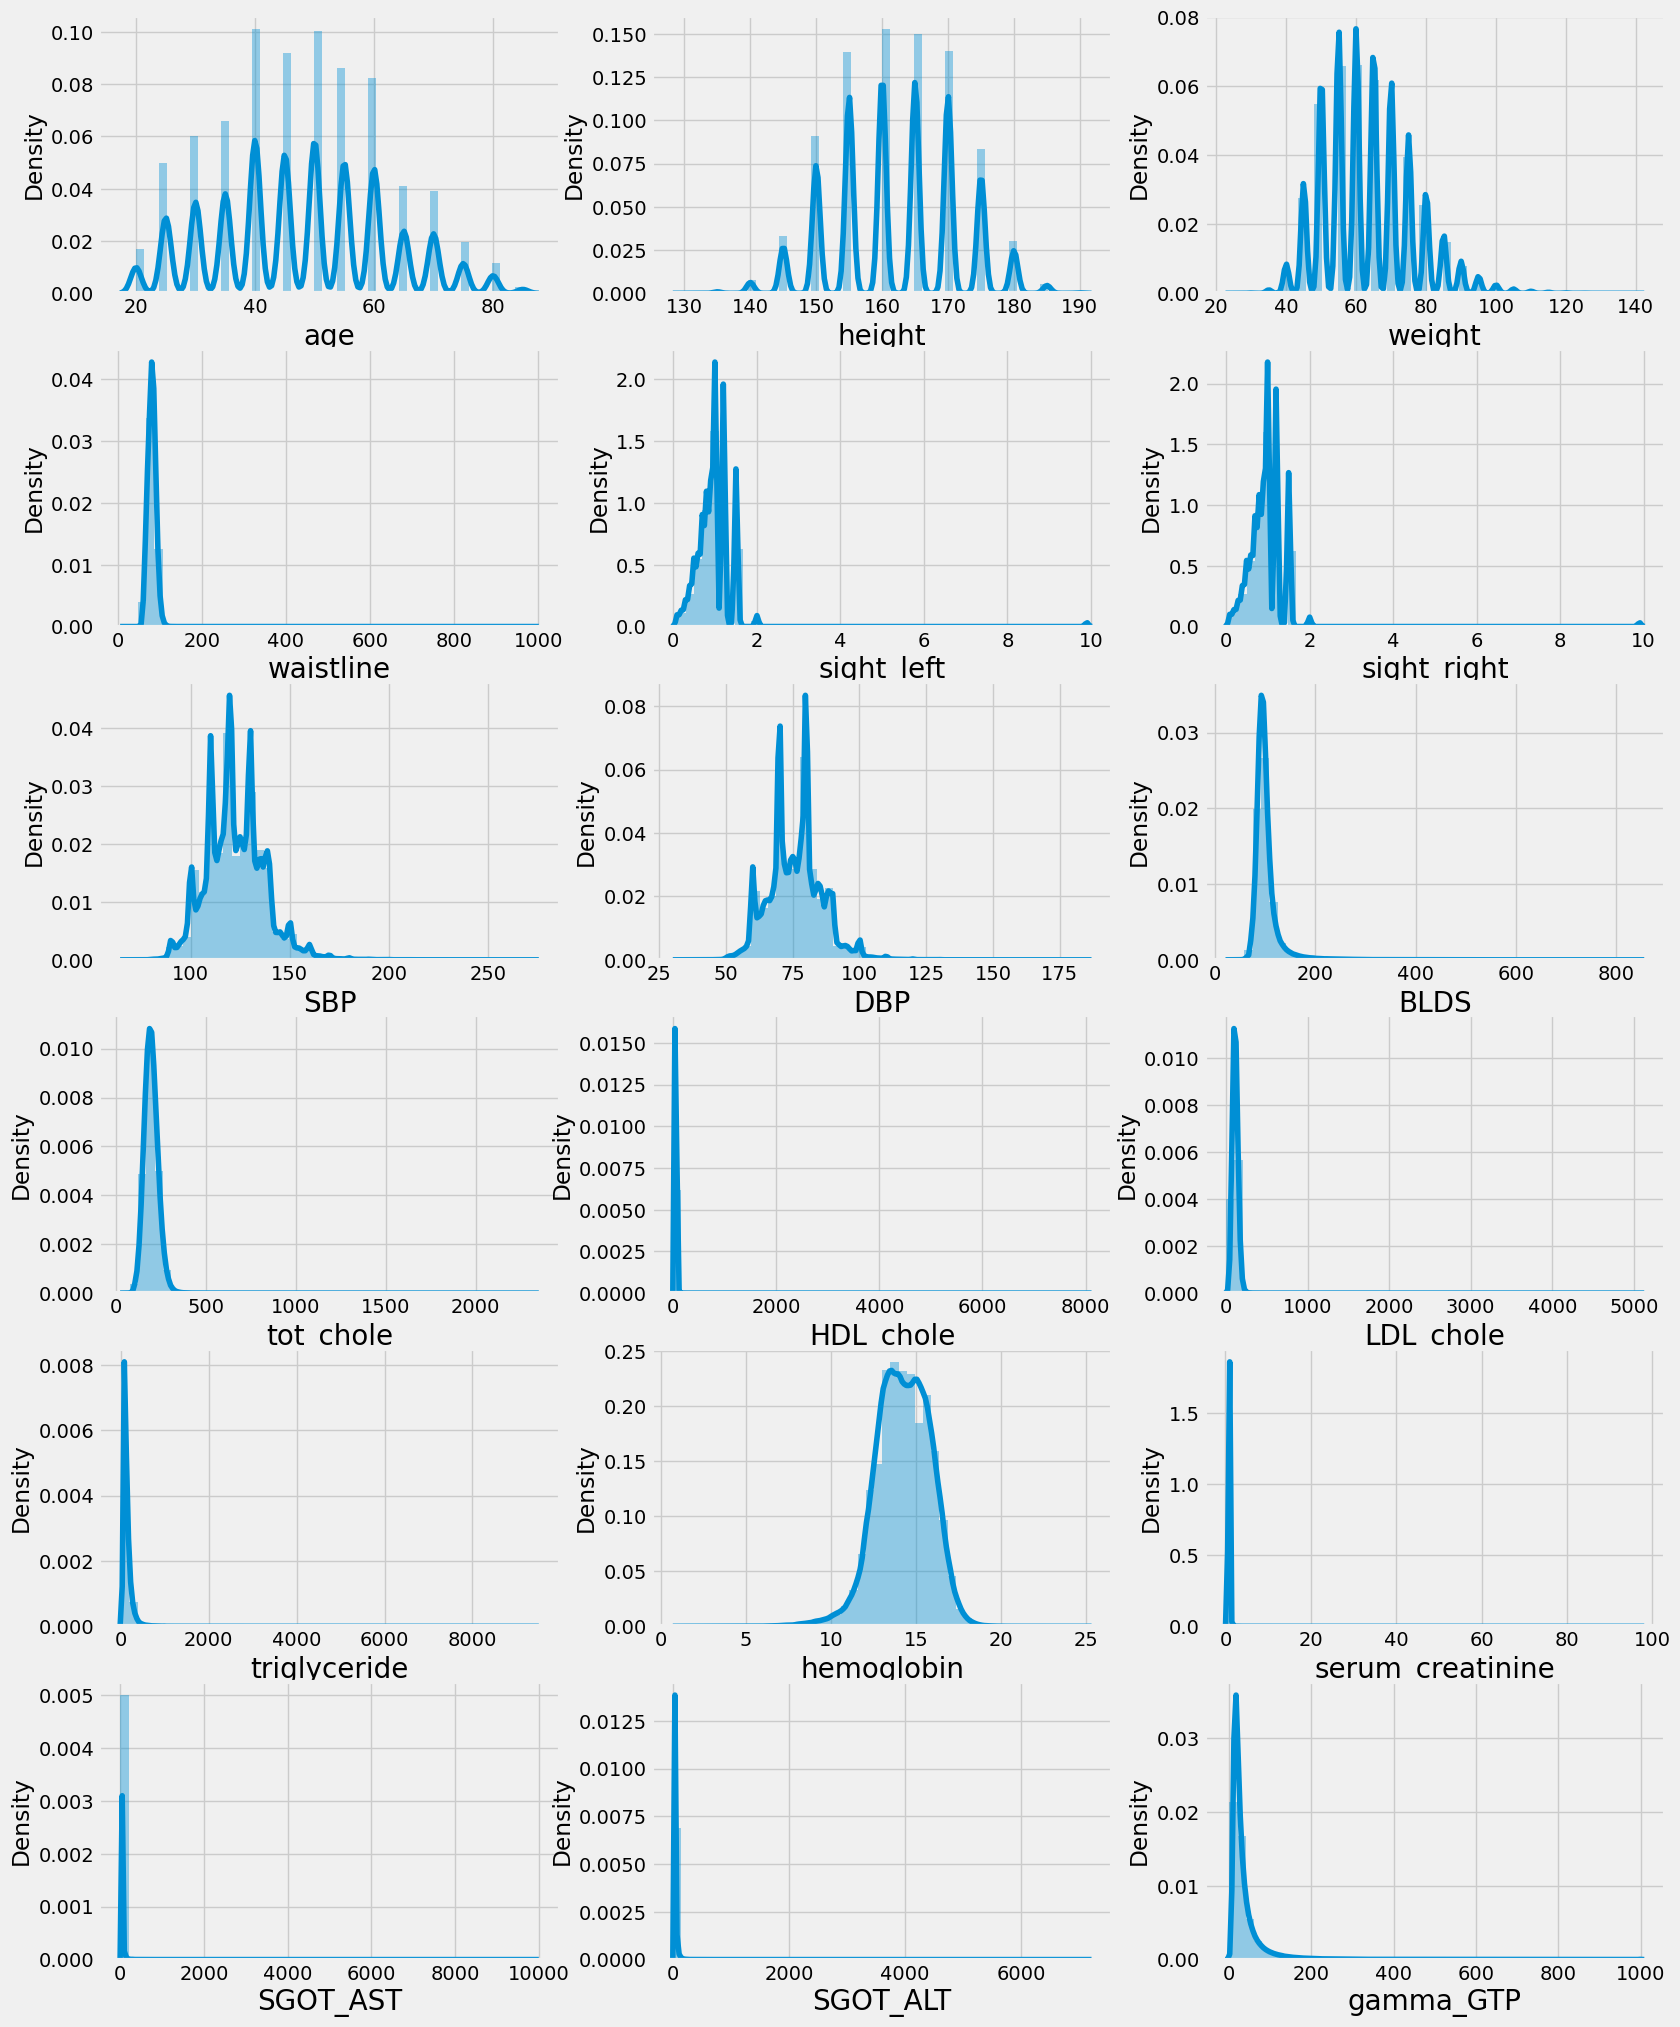

In [45]:
plt.figure(figsize=(18, 24))

for i, feature in enumerate(cont_features):
    # Add a new subplot iteratively
    ax = plt.subplot(6, 3, i + 1)  # 6 rows, 3 columns grid
    # Plot the distribution of each feature
    sns.distplot(df_smoking_drinking[feature], ax=ax)
    # Set the x-axis label
    plt.xlabel(feature, fontsize=20)

plt.show()


In [46]:
# figure, ax = plt.subplots(nrows=18, ncols=3, figsize=(64, 64))
# features = df_smoking_drinking.columns
# # print(len(df_smoking_drinking.columns))
# for (i, feature) in enumerate(df_smoking_drinking.columns):
#         # print(i)
#         # print(feature.title())
#         # print("Distribution Plot:")
#         # plt.figure(figsize=(8,8))
#         # ax[i,0].(figsize=(8,8))
#         # print(i, feature)
#         # plt.figure(figsize=(8,8))
#         sns.distplot(df_smoking_drinking[feature], ax=ax[i,0])
#         # plt.show()
#         # print("Box Plot:")
#         # ax[i,0].figure(figsize=(8,8))
#         # plt.figure(figsize=(8,8))
#         sns.boxplot(df_smoking_drinking[feature],  ax=ax[i,1])
#         # rrr 
#         # plt.show()
#         # print("Quantile-Quantile Plot:")
#         # ax[i,2].figure(figsize=(8,8))
#         # plt.figure(figsize=(8,8))
#         scipy.stats.probplot(df_smoking_drinking[feature],plot=ax[i,2],rvalue=True)
# plt.show()

- (age, height et weight ne sont pas vraiment interprétables graphiquement car tronquées)
- Les variables ne semblent pas standardisées (pas de distribution de moyenne 0 et d'écart-type 1) => à prendre en compte lors du pré-traitement
- Beaucoup de variables sont symétriques et semblent être gaussiennes => à tester avec un test de conformité à la loi normale ou alors le vérifier graphiquement (avec par exemple le  code commenté ci-dessus)

# Analyse exploratoire de données - Analyse bivariée (relation entre la variable cible / autres variables, relation entre les variables explicatives)